# Topic Modeling the Native Voices Corpus



## Methods and Preprocessing

To create each model, I used the Latent Dirichlet Allocation algorithm instantiated in MALLET, a command-line package for topic modeling. 

<b>Parameters:</b> In addition to specifying the number of topics, I also used the optimize-interval option, set to 20 to ensure more accuracy in the weighting of topics. 

<b>Output:</b> I output the following files for present and future analysis:
<ul>
    <li>topic-states.gz for use in with pyLDAvis</li>
    <li>topic-keys.txt, which I then converted to a csv file by replacing tabs with commas, saving it as this alternative file format with UTF-8 encoding, and adding a header row</li>
    <li>doc-topics.txt, which I converted to a csv file by replacing tabs with commas, and saving it as a csv with UTF-8 encoding. I then removed the first two columns with document numbers and filepaths, converted the scientific notation to numerals with six digits after the decimal place, and added a header after manually labeling each of the topics based on my analysis of the keys file.</li>
    <li>word-topic-counts-file as a txt file, which I've saved for potential later analysis and visualization using word clouds.</li>
</ul>

## Experimental Visualizations

In [2]:
# Open the topic-keys.txt that you created with MALLET. Replace the tab characters with commas. 
# Then save that file as a .csv.

import pandas as pd

nv20_topics = pd.Cov = pd.read_csv("/Users/ritc/Desktop/DRC/NV/malletfiles/20/csv/nv20-keys.csv", sep=',', names=["topic_number", "topic_weight", "top_words"])

# nv20_topics

nv20_topics.style.set_properties(subset=['top_words'], **{'width': '600px'})

,topic_number,topic_weight,top_words
0,0,0.052420,states united tribe tribes indians treaty chiefs river art indian warriors part president country missouri persons citizens made commissioners article
1,1,0.600630,indians time great people place made indian war make men part country give good order long present power received found
2,2,0.129310,brethren indians held saviour sunday service preached david detroit back indian church people early saturday monday wednesday tuesday sensemann thursday
3,3,0.034490,indian indians pounds cents john lbs yards dozen pair june services march interpreter account april half amount hundred act tobacco
4,4,0.074320,general states united letter fort sir troops ohio major hundred captain war nations secretary president militia colonel number governor department
5,5,0.104860,nation commissioners chiefs states united treaty president council father brothers general white people talk lands land warriors part red children
6,6,0.028450,georgia general treaty states agent state united government letter commissioners governor mcintosh president colonel gaines troup creek council sir survey
7,7,0.049810,fort general captain harmar miles men day arrived major lieutenant river company hundred ohio officers parsons army left colonel troops
8,8,0.103120,states state united treaty georgia lands indians congress commissioners line creek creeks indian treaties york act nations governor nation carolina
9,9,0.053790,amount indian trade goods factory march agent year office received agents georgetown april furs merchandise account superintendent traders peltries statement


In [3]:
# Create a list of topic labels.
labels = ['0 treaties','1 native-usrelations','2 religion','3 commodities','4 military','5 native-usrelations2','6 georgia','7 militarytravel','8 land','9 trade','10 military2','11 territory','12 naturalfeatures','13 treatycouncils','14 travelogue','15 governmentregulations','16 creeks','17 military','18 governmentregulations2', '19 language']
# Add the labels list as a new column to the dataframe
nv20_topics['labels'] = labels

# Adjust the style of the dataframe so that the column of top_words is wide enough to see all of them.
nv20_topics.style.set_properties(subset=['top_words'], **{'width': '500px'})

,topic_number,topic_weight,top_words,labels
0,0,0.052420,states united tribe tribes indians treaty chiefs river art indian warriors part president country missouri persons citizens made commissioners article,0 treaties
1,1,0.600630,indians time great people place made indian war make men part country give good order long present power received found,1 native-usrelations
2,2,0.129310,brethren indians held saviour sunday service preached david detroit back indian church people early saturday monday wednesday tuesday sensemann thursday,2 religion
3,3,0.034490,indian indians pounds cents john lbs yards dozen pair june services march interpreter account april half amount hundred act tobacco,3 commodities
4,4,0.074320,general states united letter fort sir troops ohio major hundred captain war nations secretary president militia colonel number governor department,4 military
5,5,0.104860,nation commissioners chiefs states united treaty president council father brothers general white people talk lands land warriors part red children,5 native-usrelations2
6,6,0.028450,georgia general treaty states agent state united government letter commissioners governor mcintosh president colonel gaines troup creek council sir survey,6 georgia
7,7,0.049810,fort general captain harmar miles men day arrived major lieutenant river company hundred ohio officers parsons army left colonel troops,7 militarytravel
8,8,0.103120,states state united treaty georgia lands indians congress commissioners line creek creeks indian treaties york act nations governor nation carolina,8 land
9,9,0.053790,amount indian trade goods factory march agent year office received agents georgetown april furs merchandise account superintendent traders peltries statement,9 trade


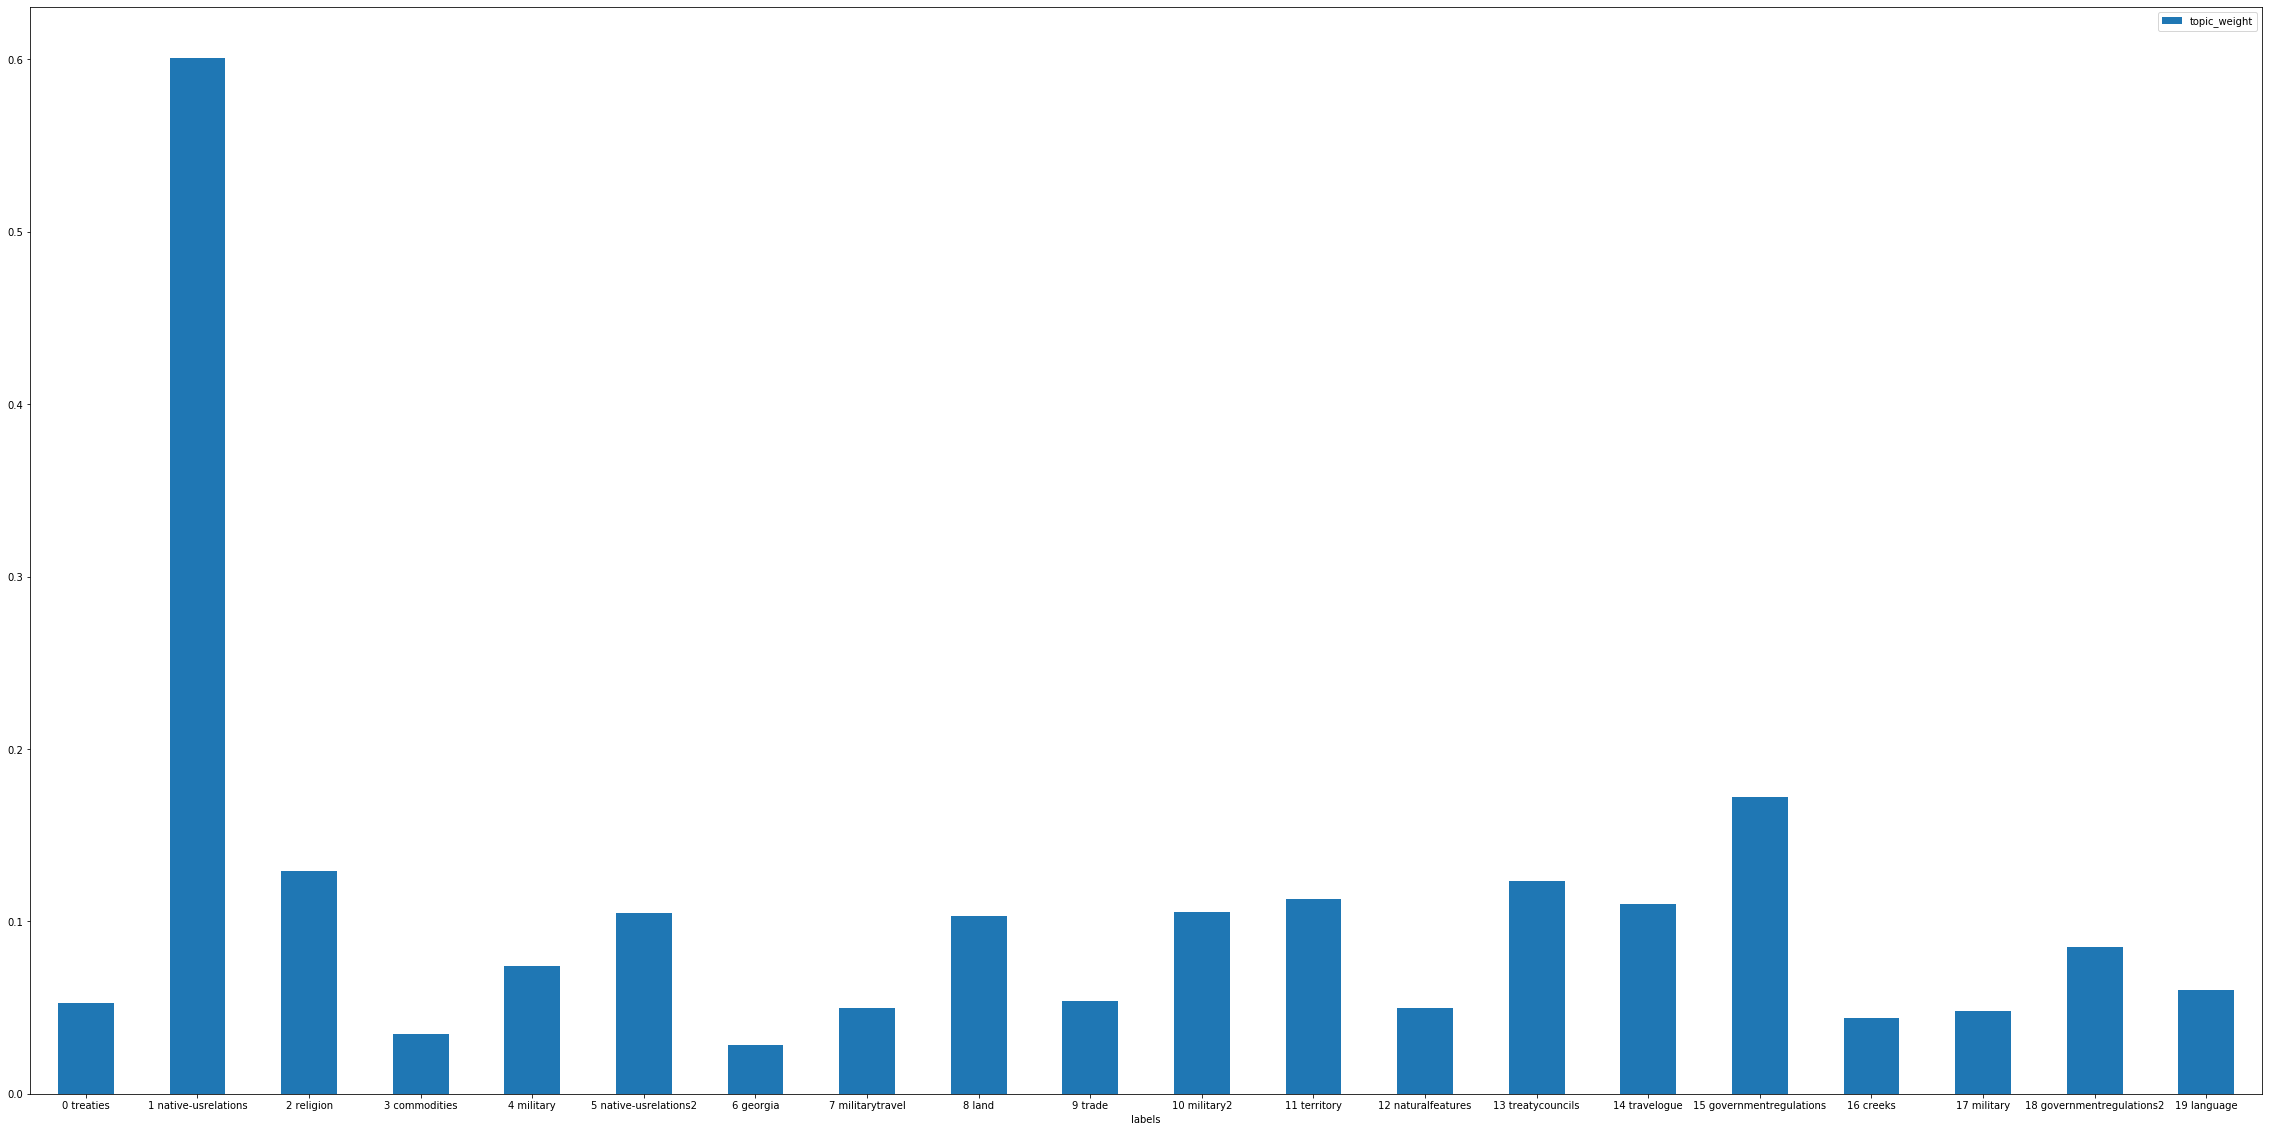

In [7]:
# Represent the weights of the topics as a simple bar chart, using the author-created topic labels. 

topic_bar = nv20_topics.plot.bar(x='labels', y='topic_weight', rot=0, figsize=(40,20))

In [10]:
# The mallet .txt doc-topics output file was converted to a csv, the document number and filepath columns 
# were deleted (in a copy of the original file), the number format was changed from scientific to decimal with 
# 6 places, and the labels from the previous step were added as column headers
# in advance of reading the csv into a pandas dataframe.

nv20_docs1 = pd.read_csv("/Users/ritc/Desktop/DRC/NV/malletfiles/20/csv/nv20-docs1.csv", sep=',')

# Preview the data
nv20_docs1.head()

,'0 treaties','1 native-usrelations','2 religion','3 commodities','4 military','5 native-usrelations2','6 georgia','7 militarytravel','8 land','9 trade','10 military2','11 territory','12 naturalfeatures','13 treatycouncils','14 travelogue','15 governmentregulations','16 creeks','17 military','18 governmentregulations2','19 language'
0,0.000223,0.049334,0.000550,0.000147,0.034338,0.004699,0.000121,0.004465,0.238592,0.000229,0.013208,0.642644,0.000211,0.000524,0.000469,0.000733,0.000186,0.000204,0.000363,0.008763
1,0.012786,0.294196,0.021125,0.000010,0.000022,0.108135,0.000008,0.000015,0.000031,0.000016,0.224554,0.000034,0.000015,0.103091,0.232574,0.000051,0.000607,0.000014,0.002698,0.000018
2,0.000017,0.161814,0.006871,0.012694,0.000024,0.329450,0.000009,0.000016,0.062144,0.018228,0.000034,0.147022,0.012048,0.091093,0.000036,0.065744,0.023428,0.068956,0.000028,0.000345
3,0.000089,0.212831,0.000219,0.000058,0.000126,0.000178,0.000048,0.000084,0.000175,0.000091,0.450917,0.000192,0.000084,0.332332,0.000187,0.000292,0.000074,0.000081,0.001839,0.000102
4,0.000001,0.342195,0.000112,0.003595,0.032243,0.047337,0.001229,0.000001,0.016599,0.000001,0.000020,0.002625,0.000001,0.007100,0.022322,0.007926,0.494754,0.017332,0.002606,0.002000


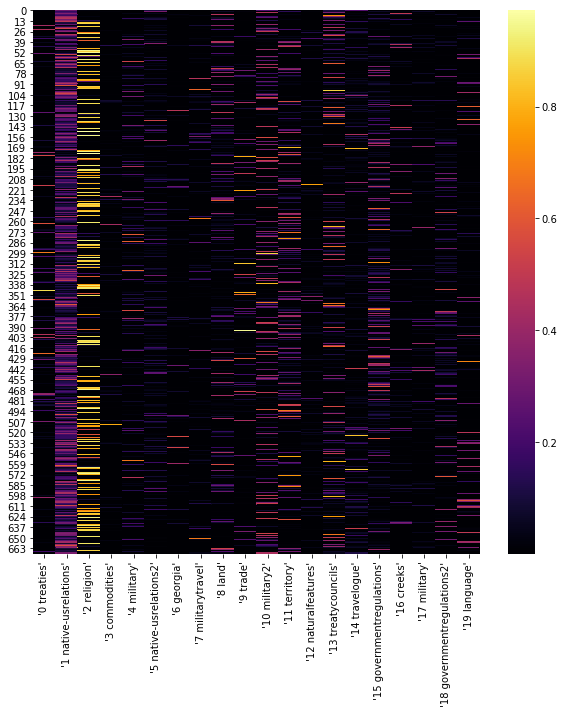

In [11]:
# Represent the topic weights in each document as a heatmap.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Set standard figure size to 10 x 10 inches.
plt.rcParams['figure.figsize'] = (10.0, 10.0)

# Set type to float to avoid unexexpected type error.
nv20_docs1 = nv20_docs1[nv20_docs1.columns].astype(float)  # or int

# Simpler code to create the default heatmap with the given figure size in line one above. Make it accessible
# by using the 'inferno' colormap. 

sns.heatmap(nv20_docs1, cmap='inferno')


/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


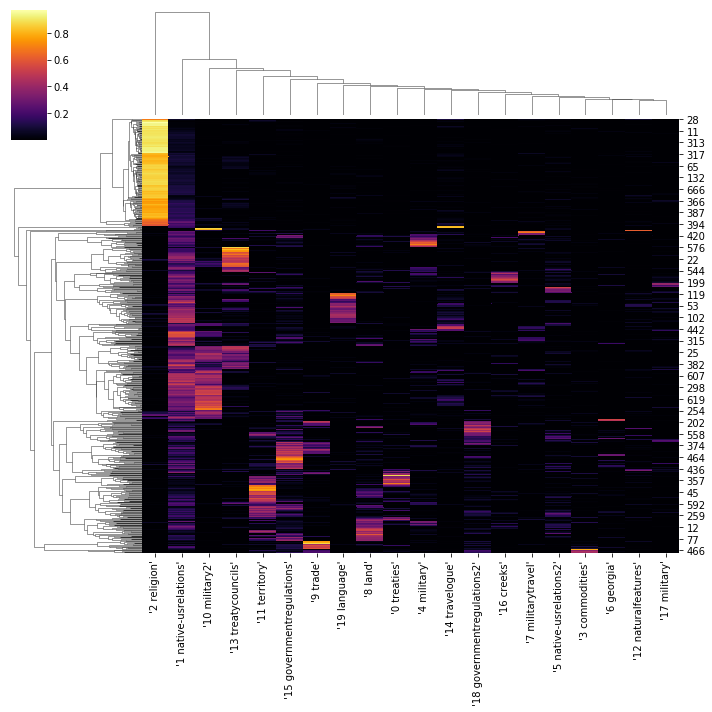

In [12]:
# Create a hierarchical heatmap using seaborn's "clustermap" method with default settings.
# By default this method will cluster by both rows and columns, which is what is most useful for this data.

sns.clustermap(nv20_docs1, cmap='inferno')

## Exploring the model in _pandas_


In [13]:
# In the duplicate csv file of the document-topic output, delete the first column (document number),
# and remove the first part of the filepath so you're left with the filename, and then remove the file
# extension (.txt).
# First we need to read in the csv file that still has the filenames:

nv20_docs = pd.read_csv("/Users/ritc/Desktop/DRC/NV/malletfiles/20/csv/nv20-docs2.csv", sep=",")

nv20_docs.head()

,filename,'0 treaties','1 native-usrelations','2 religion','3 commodities','4 military','5 native-usrelations2','6 georgia','7 militarytravel','8 land',...,'10 military2','11 territory','12 naturalfeatures','13 treatycouncils','14 travelogue','15 governmentregulations','16 creeks','17 military','18 governmentregulations2','19 language'
0,ASP-IA-v1-82.txt,0.000223,0.049334,0.000550,0.000147,0.034338,0.004699,0.000121,0.004465,0.238592,...,0.013208,0.642644,0.000211,0.000524,0.000469,0.000733,0.000186,0.000204,0.000363,0.008763
1,ASP-IA-v1-82.txt,0.012786,0.294196,0.021125,0.000010,0.000022,0.108135,0.000008,0.000015,0.000031,...,0.224554,0.000034,0.000015,0.103091,0.232574,0.000051,0.000607,0.000014,0.002698,0.000018
2,ASP-IA-v1-82.txt,0.000017,0.161814,0.006871,0.012694,0.000024,0.329450,0.000009,0.000016,0.062144,...,0.000034,0.147022,0.012048,0.091093,0.000036,0.065744,0.023428,0.068956,0.000028,0.000345
3,ASP-IA-v1-82.txt,0.000089,0.212831,0.000219,0.000058,0.000126,0.000178,0.000048,0.000084,0.000175,...,0.450917,0.000192,0.000084,0.332332,0.000187,0.000292,0.000074,0.000081,0.001839,0.000102
4,ASP-IA-v1-82.txt,0.000001,0.342195,0.000112,0.003595,0.032243,0.047337,0.001229,0.000001,0.016599,...,0.000020,0.002625,0.000001,0.007100,0.022322,0.007926,0.494754,0.017332,0.002606,0.002000


In [14]:
# Use the sort_values() method to sort the dataframe by a topic of interest. 

nv20_docs_creeks = nv20_docs.sort_values("'16 creeks'", ascending=False)

nv20_docs_creeks.head(10)

,filename,'0 treaties','1 native-usrelations','2 religion','3 commodities','4 military','5 native-usrelations2','6 georgia','7 militarytravel','8 land',...,'10 military2','11 territory','12 naturalfeatures','13 treatycouncils','14 travelogue','15 governmentregulations','16 creeks','17 military','18 governmentregulations2','19 language'
5,ASP-IA-v1-82.txt,0.000007,0.309125,0.000017,0.000004,0.017706,0.055283,0.000004,0.000006,0.000013,...,0.000142,0.010658,0.000006,0.000144,0.013992,0.001689,0.561806,0.029372,0.000011,0.000008
143,ASP-IA-v1-82.txt,0.000042,0.381277,0.000909,0.000028,0.033067,0.000084,0.000023,0.000040,0.022625,...,0.008136,0.000091,0.000040,0.003320,0.004919,0.013825,0.512859,0.018555,0.000069,0.000049
145,ASP-IA-v1-82.txt,0.000035,0.321394,0.008654,0.000023,0.000049,0.015229,0.000019,0.000033,0.069936,...,0.012593,0.000074,0.000033,0.000081,0.014574,0.012637,0.510198,0.034307,0.000056,0.000040
4,ASP-IA-v1-82.txt,0.000001,0.342195,0.000112,0.003595,0.032243,0.047337,0.001229,0.000001,0.016599,...,0.000020,0.002625,0.000001,0.007100,0.022322,0.007926,0.494754,0.017332,0.002606,0.002000
226,ASP-IA-v1-82.txt,0.000012,0.222277,0.004672,0.044807,0.012784,0.024861,0.000007,0.016956,0.022772,...,0.000025,0.064555,0.000011,0.000029,0.012096,0.019074,0.475389,0.026705,0.026946,0.000014
43,ASP-IA-v1-82.txt,0.000024,0.200635,0.000523,0.001867,0.198540,0.000049,0.000013,0.000023,0.023646,...,0.000049,0.000052,0.000023,0.000057,0.018097,0.086608,0.456723,0.012978,0.000039,0.000028
118,ASP-IA-v1-82.txt,0.000039,0.300419,0.000097,0.000026,0.072229,0.000079,0.000021,0.000037,0.032405,...,0.030151,0.000085,0.000037,0.000093,0.085788,0.000130,0.451112,0.027101,0.000064,0.000045
46,ASP-IA-v1-82.txt,0.000057,0.315878,0.000140,0.000037,0.048827,0.006613,0.000031,0.000054,0.000112,...,0.000114,0.000122,0.000054,0.000134,0.144193,0.000187,0.413851,0.061798,0.004425,0.000065
117,ASP-IA-v1-82.txt,0.000070,0.348859,0.000174,0.000046,0.000100,0.117054,0.010789,0.000067,0.096894,...,0.000142,0.000152,0.000067,0.000166,0.006867,0.000231,0.392457,0.020222,0.005490,0.000081
199,ASP-IA-v1-82.txt,0.000097,0.287285,0.000240,0.000064,0.026153,0.000195,0.000053,0.000093,0.223181,...,0.000196,0.052241,0.000092,0.007662,0.000205,0.000320,0.356864,0.044687,0.000159,0.000112


I'm currently working on a way to create the corpus as JSON file, which *should* remove the problem of character limits. Then, we can read the JSON file into a pandas dataframe and merge that dataframe with the <b>docs</b> dataframe in order to view the content of each document within the dataframe, rather than having to toggle between a jupyter notebook, finder window, and the plain text files, but for now, the latter option is a workaround.

For our current exploration of the "military" topic, see the <a href="https://voyant-tools.org/?corpus=bdabc2797ab5226bfb1af925351d2ea5&panels=cirrus,reader,trends,summary,contexts">Voyant-Tools interface</a> that I have already pre-populated with the ten most closely related documents.